In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ndcg_score
import xgboost

# Данные

In [73]:
train = pd.read_csv('train.csv')
train

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0
...,...,...,...,...,...,...
70267,Ces3rnIMR7DglB8HifRxgPcQFzCSi1hwkXLng1V3Y98=,eb2X6wyODs13SdC6tDZw3hHcZiySw67y5hySDM6seHs=,discover,Online playlist more,online-playlist,1.0
70268,Ces3rnIMR7DglB8HifRxgPcQFzCSi1hwkXLng1V3Y98=,BwDDym6Tp7EnGudWBGJyjONZeX0/4ndu5PETiPWzav8=,discover,Online playlist more,online-playlist,0.0
70269,PMNH14ou/Hsrq5Dh96GXes0MyIWt9xtbeZOH2J3ycDE=,DZeyuyeNTKDHPhltrnUoFIuXFz1DQtg0UAlwjDFkM3M=,my library,Local playlist more,local-playlist,1.0
70270,LUfjLOplxjOphIEXvhqywoXeAPUIWJ7YwWEsynF8XyY=,5AOMgnK4SBaOcF1eQFVH7BDRIKdWokgT83dzhsMuvxk=,my library,Local playlist more,local-library,1.0


# Предобработка данных

Удалим NaN

In [74]:
train = train.dropna()

Проверим на пропуски

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67626 entries, 0 to 70270
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   msno                67626 non-null  object 
 1   song_id             67626 non-null  object 
 2   source_system_tab   67626 non-null  object 
 3   source_screen_name  67626 non-null  object 
 4   source_type         67626 non-null  object 
 5   target              67626 non-null  float64
dtypes: float64(1), object(5)
memory usage: 3.6+ MB


In [76]:
del test['id']
test = test.dropna()

Переведм категориальные признаки в числа

In [77]:
name = ['msno',	'song_id',	'source_system_tab',	'source_screen_name',	'source_type']
categorial_data = pd.DataFrame()
categorial_data = train.copy()
Y = pd.DataFrame(categorial_data['target'])
del categorial_data['target']
le = LabelEncoder()
X = pd.DataFrame()
for i in name:
  le.fit(categorial_data[i])
  X[i] = le.transform(categorial_data[i])
X

,msno,song_id,source_system_tab,source_screen_name,source_type
0,1363,4657,1,6,5
1,2884,13891,3,7,4
2,2884,7538,3,7,4
3,2884,1429,3,7,4
4,1363,2062,1,6,5
...,...,...,...,...,...
67621,1158,12046,0,10,5
67622,1158,15012,0,10,5
67623,1158,4916,0,10,5
67624,2188,5480,3,7,4


In [78]:
Y

,target
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
70266,0.0
70267,1.0
70268,0.0
70269,1.0


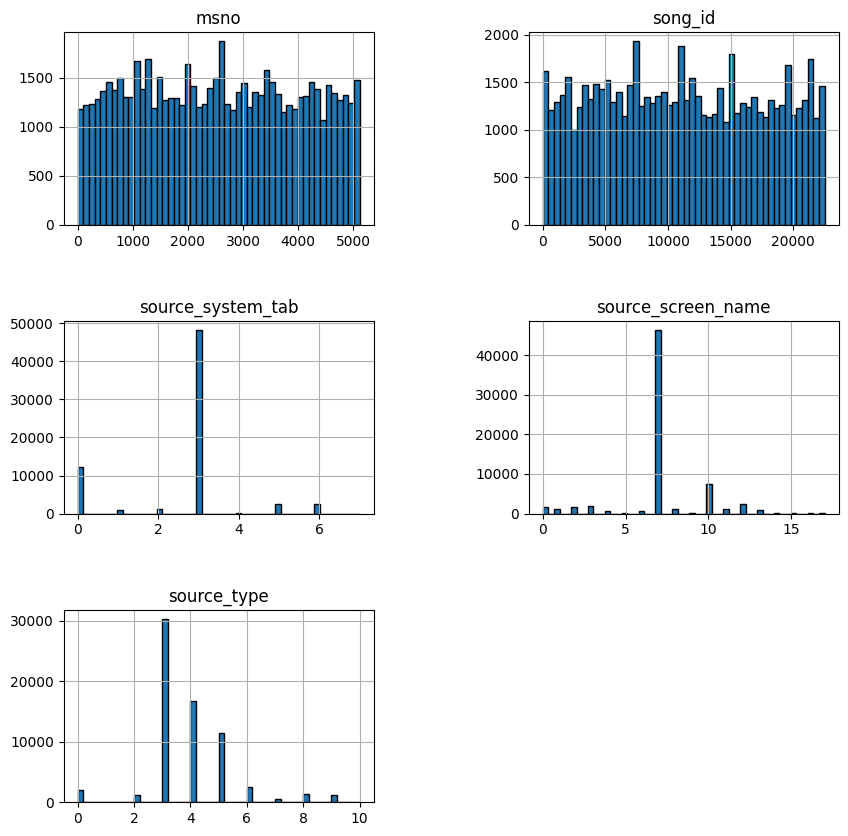

In [79]:
X.hist(figsize=(10, 10), bins=50, edgecolor="black")
plt.subplots_adjust(hspace=0.5, wspace=0.5)

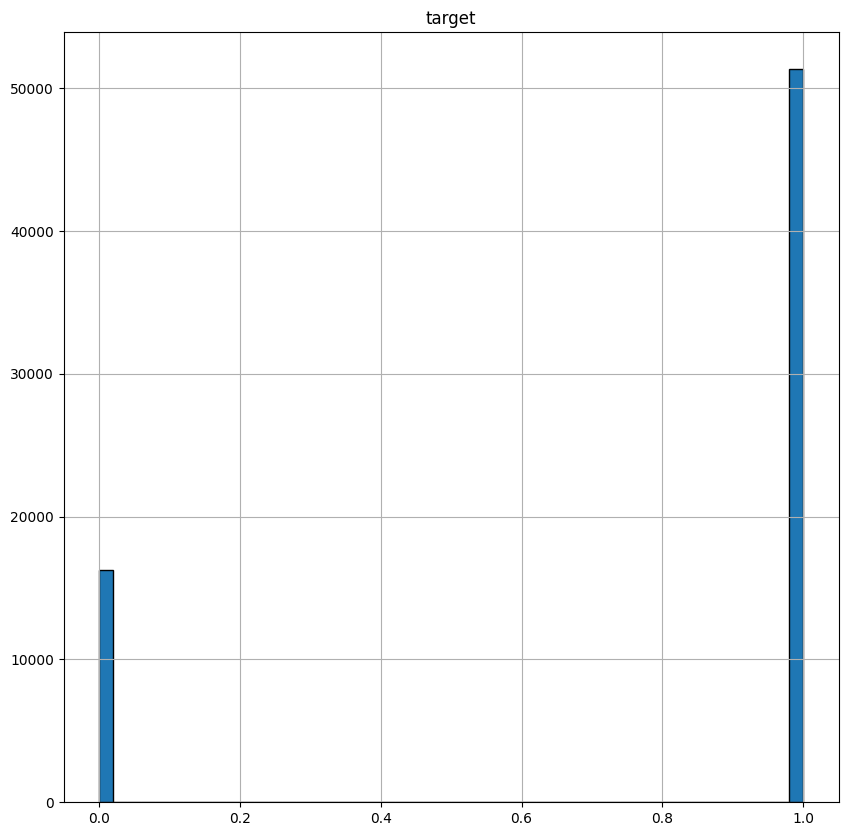

In [80]:
Y.hist(figsize=(10, 10), bins=50, edgecolor="black")
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# fit и predict

Разделим данные на обучающие и тестовые

In [81]:
X, Y = np.array(X), np.array(Y).astype('int8')
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

LogisticRegression

In [82]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state = 42)
log_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [83]:
pred_log = log_model.predict(x_test)

In [84]:
f1_log = f1_score(y_test, pred_log)
print("f1_score LogisticRegression:", f1_log)

f1_score LogisticRegression: 0.8631702807194487


DecisionTreeClassifier

In [85]:
dtc = DecisionTreeClassifier()

# опишем сетку, по которой будем искать
param_grid = {
    'max_depth': np.arange(1, 50, 5),
}

# создадим объект GridSearchCV
search = GridSearchCV(dtc, param_grid, n_jobs=-1, cv=5, refit=True, scoring='f1_micro')

# запустим поиск
search.fit(x_train, y_train)

# выведем наилучшие параметры
print(search.best_params_)

{'max_depth': 16}


In [86]:
clf = DecisionTreeClassifier(max_depth=16, random_state = 42)
clf.fit(x_train, y_train)
p = clf.predict(x_test)
print("f1_score DecisionTree:", f1_score(y_test, p, average='micro'))

f1_score DecisionTree: 0.8053378678101434


XGBoost

In [87]:
xgbrf = xgboost.XGBClassifier()

param_grid1 = {
    'max_depth': np.arange(10, 50, 10),
    'max_leaves': np.arange(10, 60, 10),
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': np.arange(1, 190, 50),
}

search1 = GridSearchCV(xgbrf, param_grid1, n_jobs=-1, cv=5, refit=True, scoring='neg_mean_squared_error')
search1.fit(x_train, y_train)
print(search1.best_params_)

{'learning_rate': 1, 'max_depth': 10, 'max_leaves': 30, 'n_estimators': 51}


In [88]:
xgbrf = xgboost.XGBClassifier(learning_rate=1, max_depth=10, max_leaves=30, n_estimators=51, random_state=42)
xgbrf.fit(x_train, y_train)
p_xgb = xgbrf.predict(x_test)
print("f1_score XGBClassifier:", f1_score(y_test, p_xgb))

f1_score XGBClassifier: 0.8780042036004753


# Вывод

f1_score LogisticRegression: 0.8631702807194487

f1_score DecisionTree: 0.8053378678101434

f1_score XGBClassifier: 0.8780042036004753

Лучше всего справился XGBClassifier